step 1: import required libraries


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

step 2:Load the Data


In [146]:
data = pd.read_csv("/content/heartdisease.csv")

In [147]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


step 3: defining target variable

In [148]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


By the given dataset, the target variable is in categorical, therefore it is  **Classification(supervised learning)**

In [149]:
data.shape

(918, 12)

In [150]:
data.size

11016

In [151]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [152]:
data.describe(include="O")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


step 4: dividing  the columns into numerical and categorical variable

In [154]:
num_data = data.select_dtypes(include="number").drop(columns="HeartDisease")
cat_data = data.select_dtypes(include="object")

In [155]:
num_data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0


In [156]:
cat_data.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


## Exploratory Data Analysis

step 5: univariate graph for numericals and categoricals

In [157]:
len(num_data.columns)

6

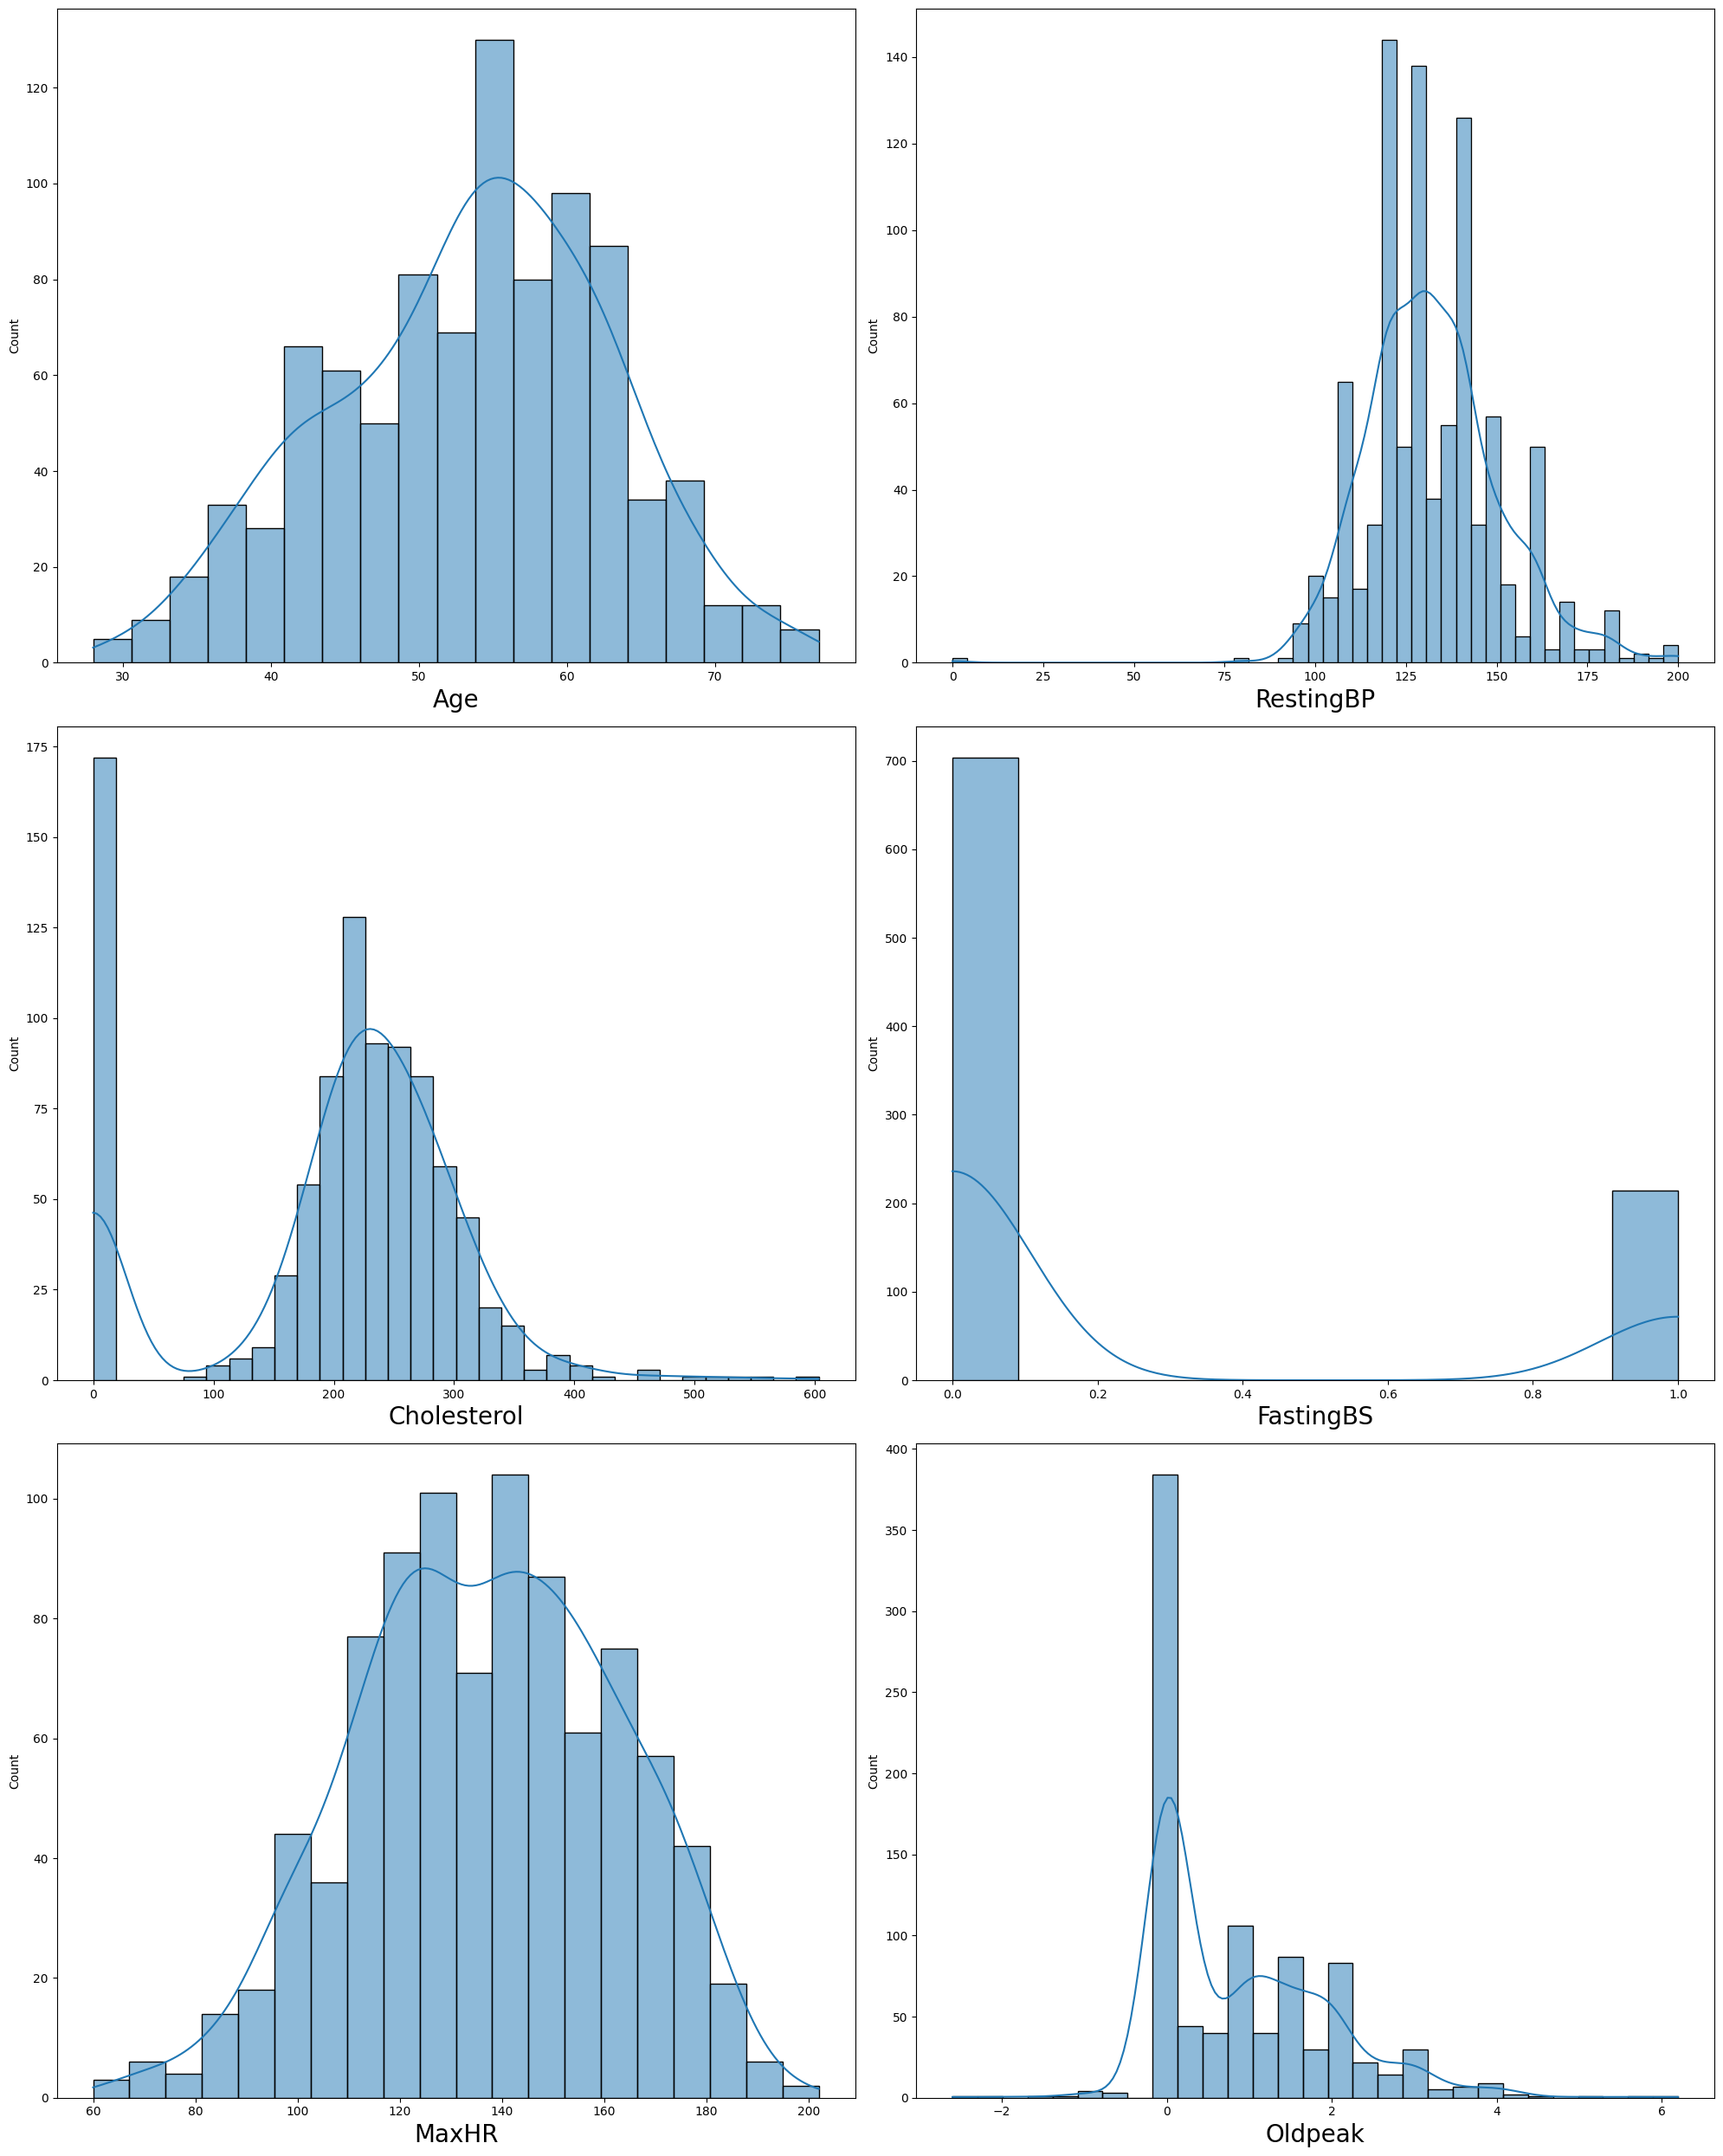

In [158]:
plt.figure(figsize=(20,25),facecolor="white")

plotnumber = 1

for column in num_data:
  if plotnumber<=6:
    ax = plt.subplot(3,2,plotnumber)
    sns.histplot(data = num_data,x=column,kde=True)
    plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.tight_layout()

for num_data all variables are continuous numerical except FastingBS variable is discrete numerical

In [159]:
data.FastingBS.unique()

array([0, 1])

<Axes: xlabel='FastingBS', ylabel='count'>

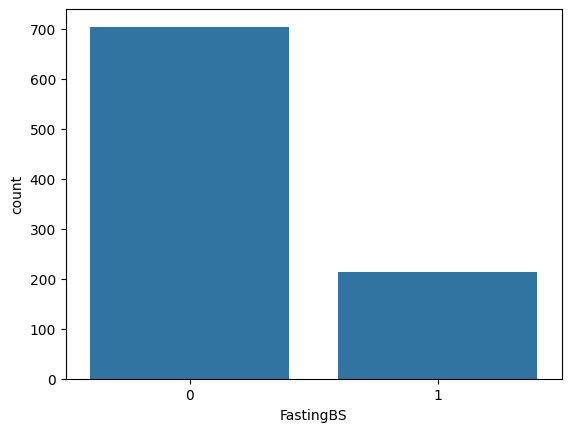

In [160]:
sns.countplot(data=num_data,x="FastingBS")

In [161]:
len(cat_data.columns)

5

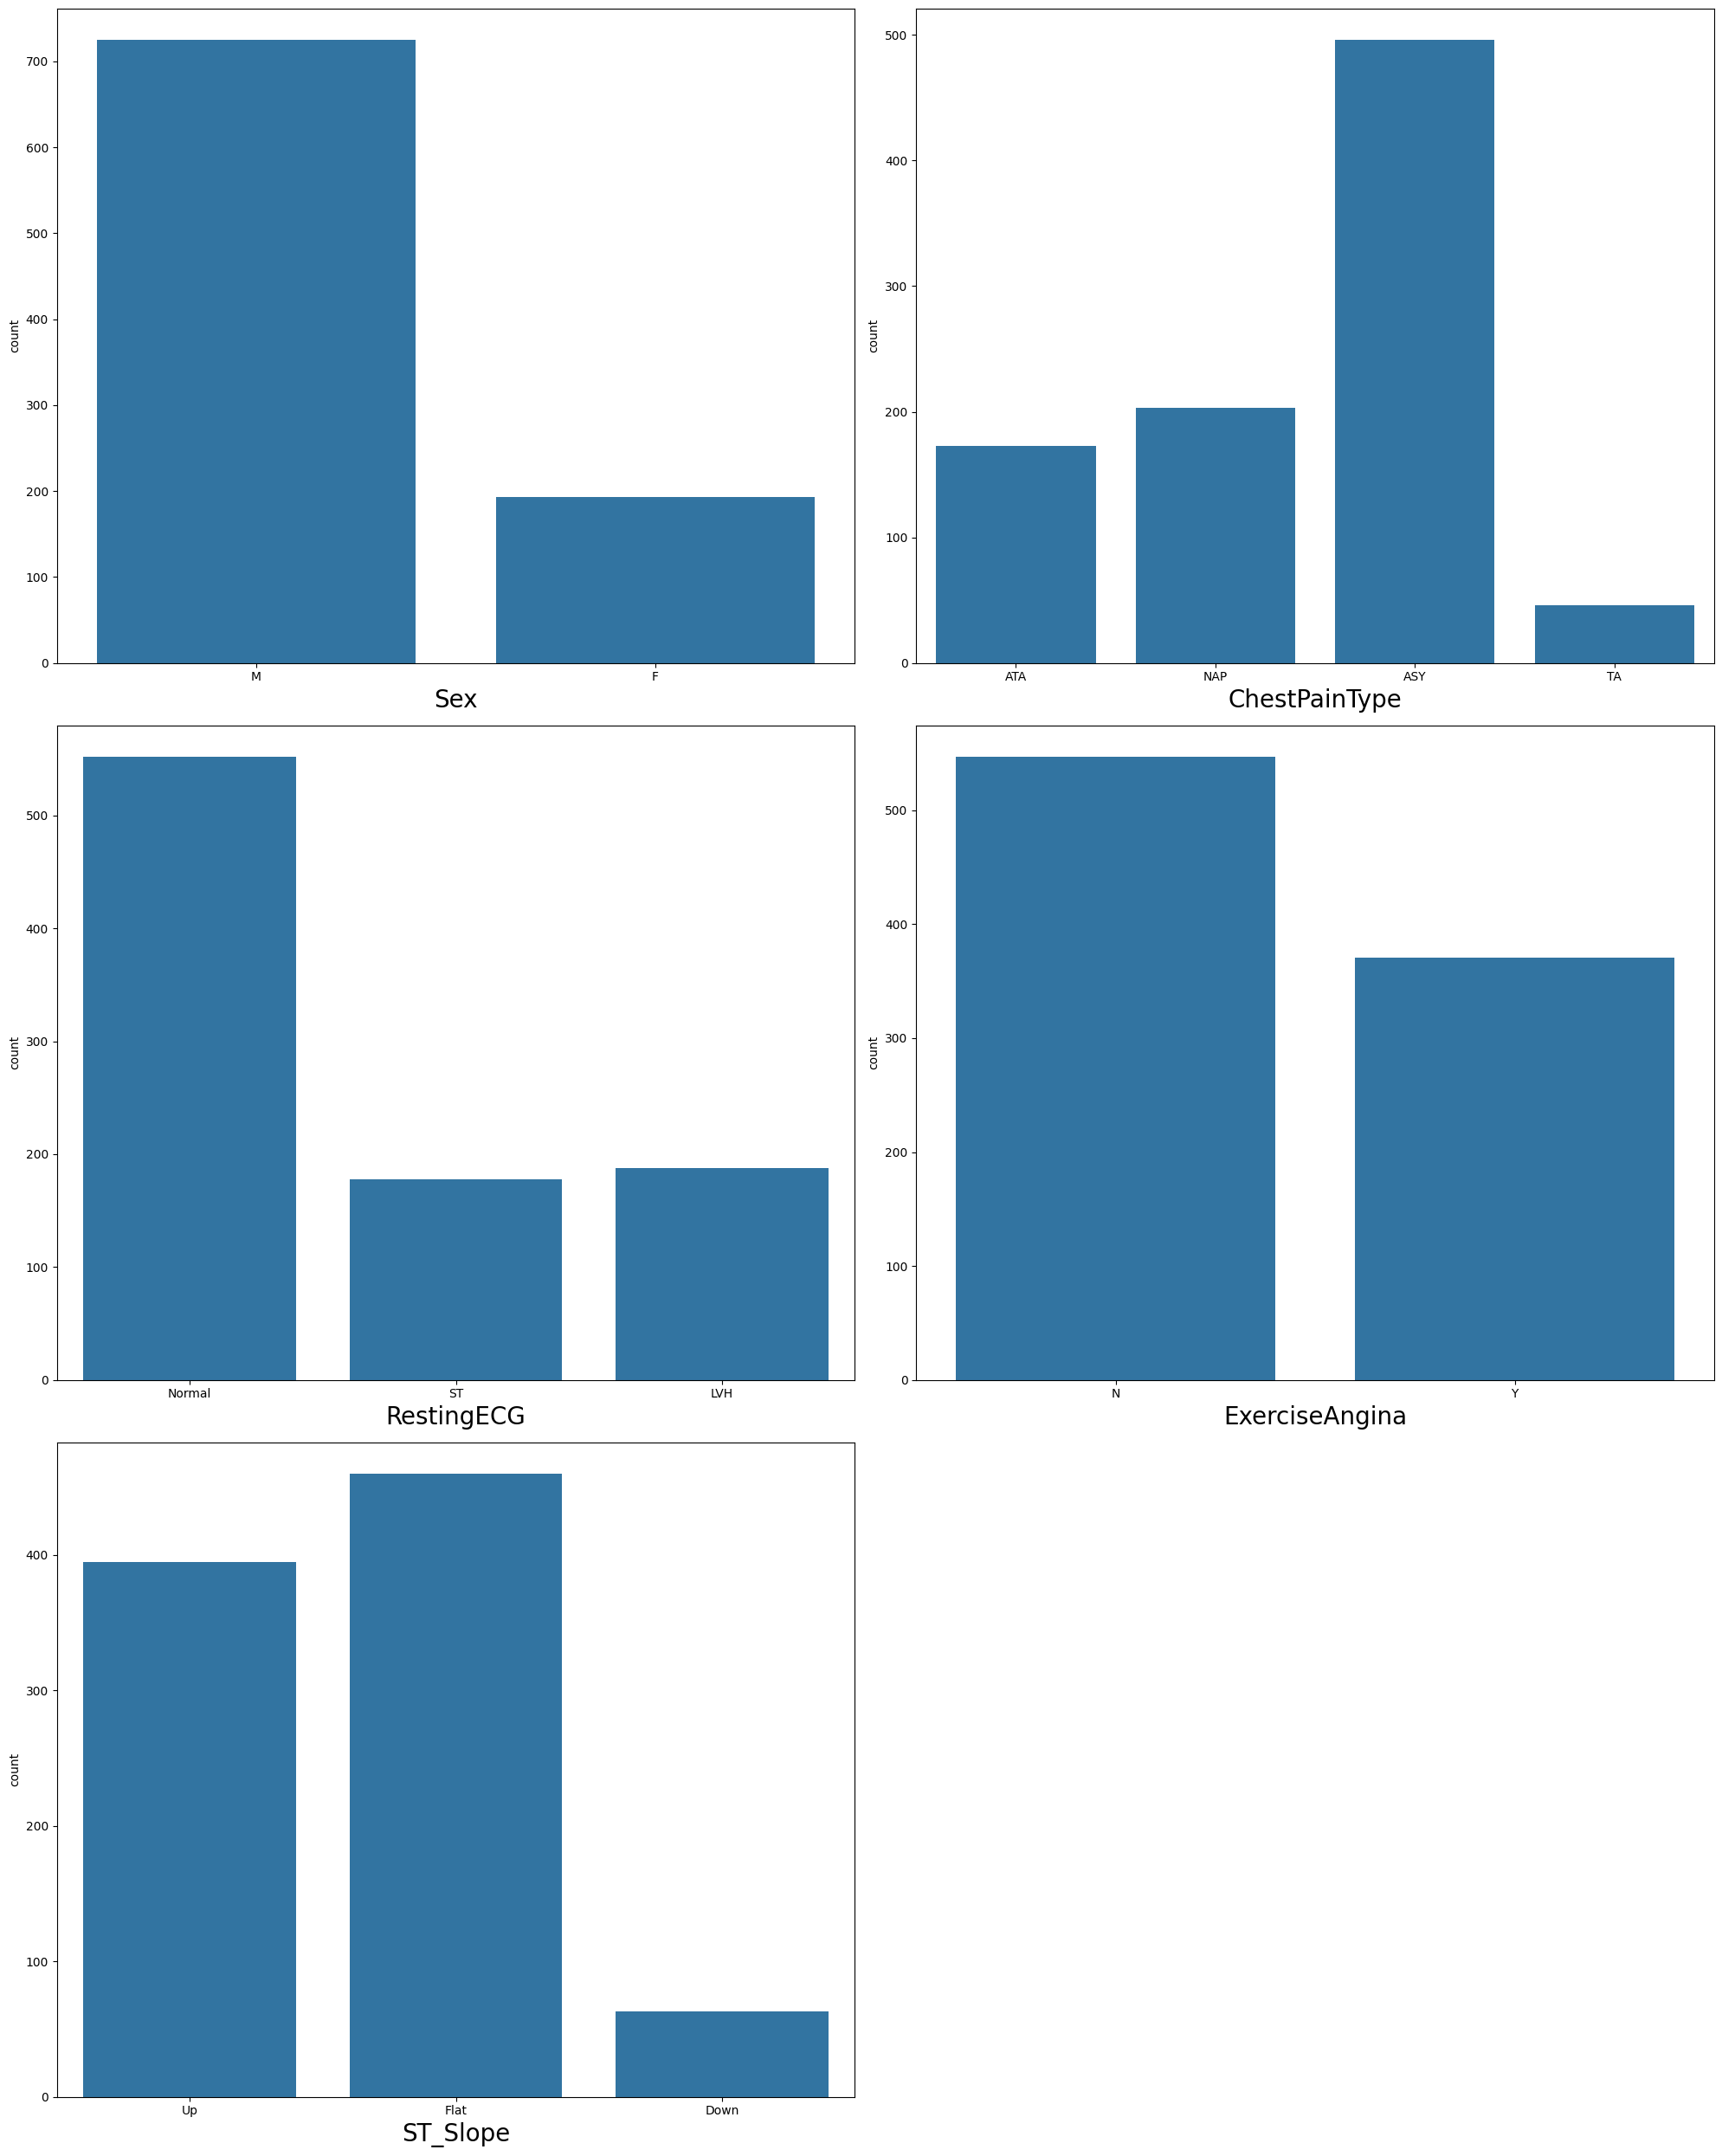

In [162]:
plt.figure(figsize=(20,25), facecolor="white")

plotnumber = 1

for column in cat_data:
    if plotnumber<=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.countplot(data=cat_data,x=column)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1

plt.tight_layout()
plt.show()


step:6 Bivariate Analysis of numerical variable and categorical

In [163]:
num_data.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')

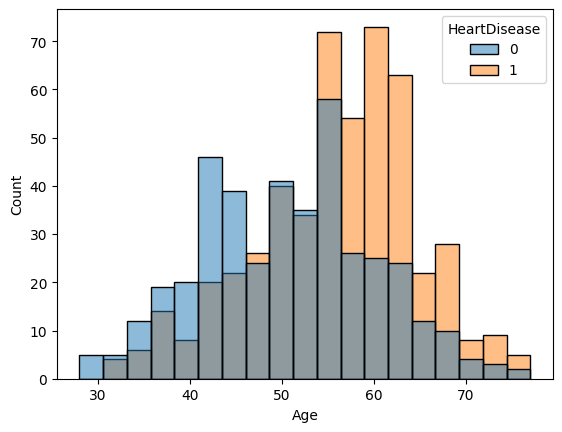

In [164]:
sns.histplot(data=data,x="Age",hue="HeartDisease")
plt.show()

In the given data, upto age 45 risk of getting heartdisease is less.
from age 45 onwards, risks of getting heartdisease is higher.

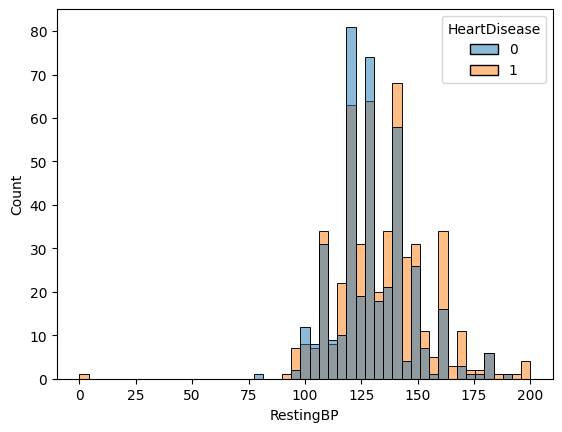

In [165]:
sns.histplot(data=data, x='RestingBP', hue='HeartDisease')
plt.show()

*some patients data shows 0 bp, they could be measurement error or data entry errors.*

*Risk starts to rise significantly with BP above 120.*

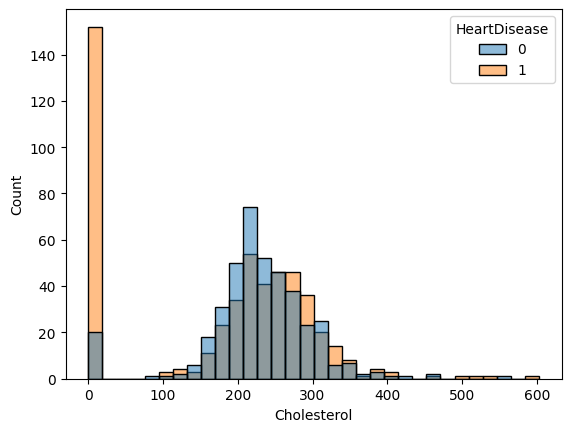

In [166]:
sns.histplot(data=data, x='Cholesterol', hue='HeartDisease')
plt.show()

A cholesterol value of 0 is  an error.
    
cholesterol value from 100 to 200 chances of getting heartdesease is lesser.

If a person have cholesterol more than 200,higher is the chance of getting heartdesease.

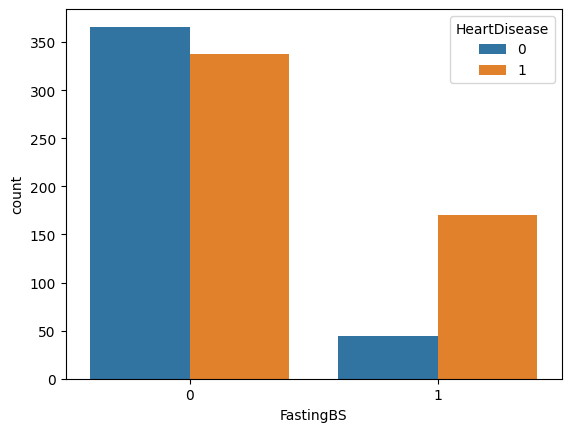

In [167]:
sns.countplot(data=data, x="FastingBS", hue="HeartDisease")
plt.show()


if FastingBS is 0 then chances of heartdisease is at equal risk (50-50).

if FastingBS is 1 then chances of heartdisease increases.

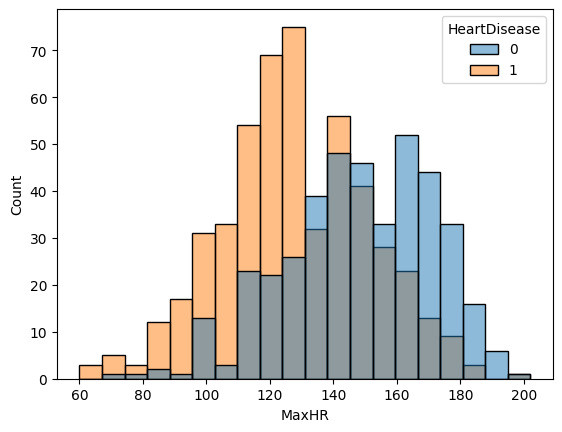

In [168]:
sns.histplot(data=data,x='MaxHR',hue='HeartDisease')
plt.show()

if patient has value of heartrate(HR) from 60 to 140 chances of getting HeartDisease is higher.

from 140 to 160 is at equal risk .

160 onwards chances are lesser.

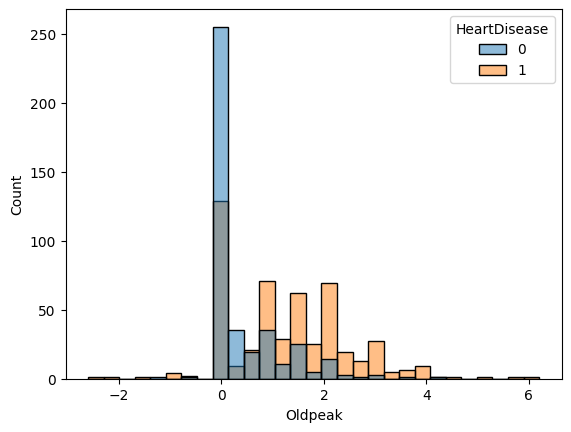

In [169]:
sns.histplot(data=data,x='Oldpeak',hue='HeartDisease')
plt.show()

if patient has oldpeak < 0 or oldpeak > 0 chances of getting heartdisease is higher.

if  patient has oldpeak = 0 then chances of getting heartdisease is lesser.

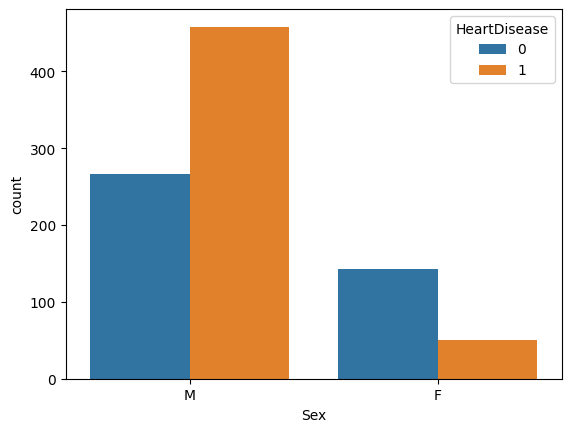

In [170]:
sns.countplot(data=data, x="Sex", hue='HeartDisease')
plt.show()

chances of getting heartdisease for Male is higher than Female

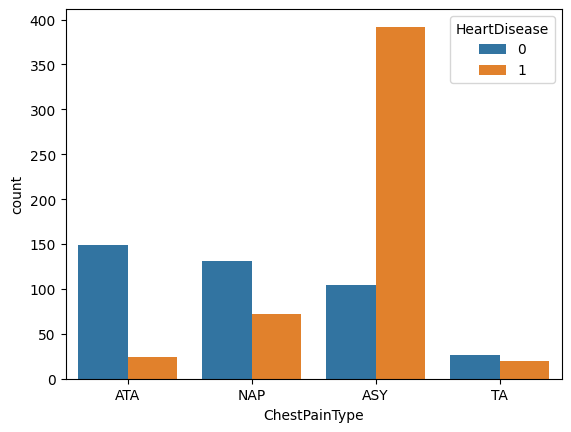

In [171]:
sns.countplot(data=data, x="ChestPainType", hue='HeartDisease')
plt.show()


if patient has ASY chestpain then higher is the chance of heartdisease.Other typeof chestpain have lesser chance.

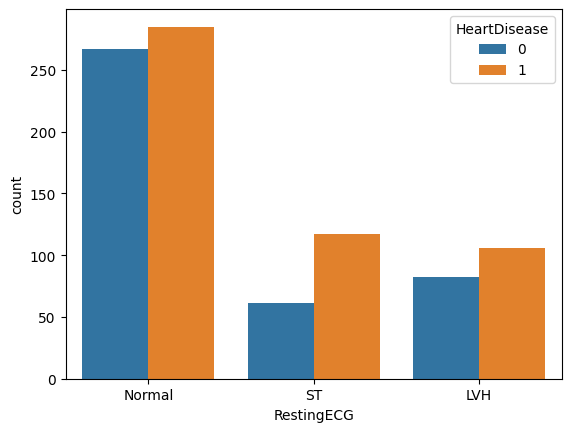

In [172]:
sns.countplot(data=data, x="RestingECG", hue='HeartDisease')
plt.show()

No specific relationship found

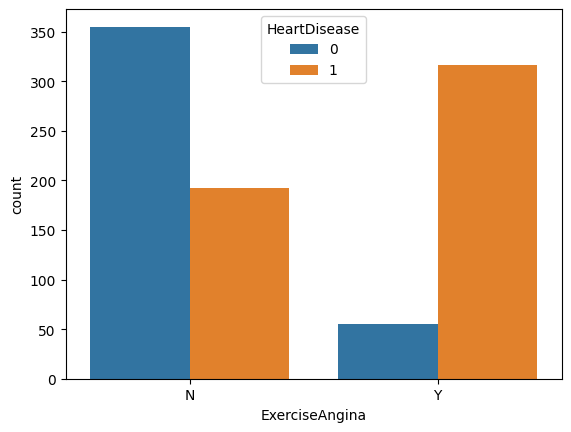

In [173]:
sns.countplot(data=data, x="ExerciseAngina", hue='HeartDisease')
plt.show()

The patient experiences angina during exercise then it has higher chance of getting heartdisease.

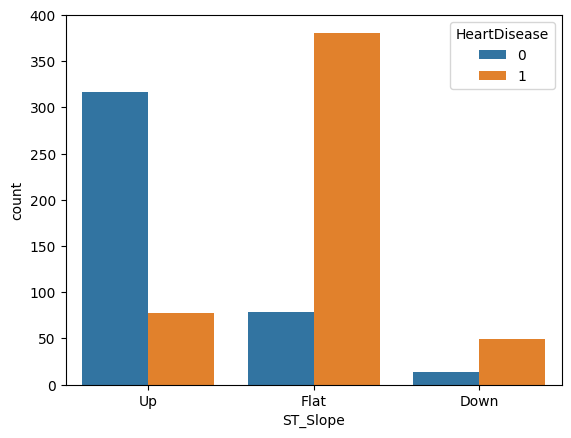

In [174]:
sns.countplot(data=data, x="ST_Slope", hue='HeartDisease')
plt.show()


if patients report shows up ST_slope then ,it has lesser chance of heartdisease.

if patients report shows flat and down ST_slope it has higher chance of heartdisease.

# Data Preprocessing and Feature Engineering

step:6 Finding missing values

In [175]:
data.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


there is no missing value in this dataset.

In [176]:
# In "Cholesterol" column certain datapoints are zero

data.loc[data.Cholesterol==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [177]:
data.Cholesterol.median()

223.0

In [178]:
data.Cholesterol.replace(0,data.Cholesterol.median(),inplace=True)

replacing zero values with median

In [179]:
data.loc[data.Cholesterol==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [180]:
# In 'RestingBP' column certain datapoints are zero.

data.loc[data.RestingBP==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,223,0,Normal,155,N,1.5,Flat,1


In [181]:
data.RestingBP.replace(0,data.RestingBP.median(),inplace=True)

replacing the zero values with median.

step:9 checking outliers and handling.

<Axes: xlabel='RestingBP'>

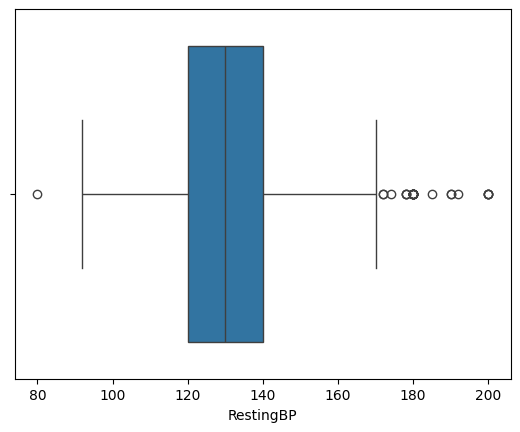

In [182]:
sns.boxplot(data=data,x="RestingBP")

there are some outliers in the RestingBP, values<90 values>170 are outliers.

<Axes: xlabel='Cholesterol'>

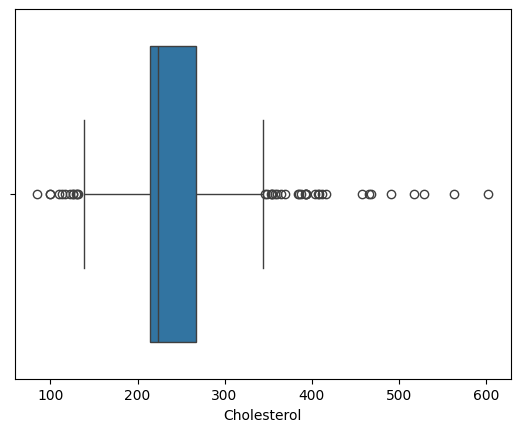

In [183]:
sns.boxplot(data=data, x='Cholesterol')

there are outliers in Cholesterol as well. i.e values>350 and values <150

<Axes: xlabel='MaxHR'>

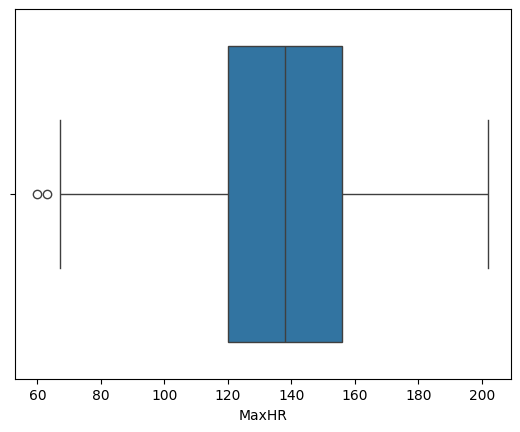

In [184]:
sns.boxplot(data=data, x='MaxHR')

there are very few outliers in this MaxHR column.

<Axes: xlabel='Oldpeak'>

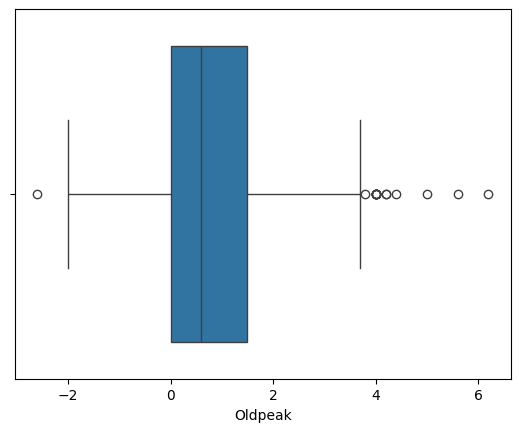

In [185]:
sns.boxplot(data=data, x='Oldpeak')

there are outliers in this MaxHR column, value<2 and value>3 are outliers.

In [186]:
num_data.skew()

,0
Age,-0.195933
RestingBP,0.179839
Cholesterol,-0.610086
FastingBS,1.264484
MaxHR,-0.144359
Oldpeak,1.022872


In [187]:
z_scores = data[["RestingBP","Cholesterol","MaxHR","Oldpeak"]]

In [188]:
z_scores

,RestingBP,Cholesterol,MaxHR,Oldpeak
0,140,289,172,0.0
1,160,180,156,1.0
2,130,283,98,0.0
3,138,214,108,1.5
4,150,195,122,0.0
...,...,...,...,...
913,110,264,132,1.2
914,144,193,141,3.4
915,130,131,115,1.2
916,130,236,174,0.0


In [189]:
from scipy.stats import zscore

# calculate z-scores for all numerical columns
z_scores = z_scores.apply(zscore)


In [190]:
z_scores

,RestingBP,Cholesterol,MaxHR,Oldpeak
0,0.415002,0.897407,1.382928,-0.832432
1,1.527329,-1.122849,0.754157,0.105664
2,-0.141161,0.786200,-1.525138,-0.832432
3,0.303769,-0.492677,-1.132156,0.574711
4,0.971166,-0.844832,-0.581981,-0.832432
...,...,...,...,...
913,-1.253488,0.434046,-0.188999,0.293283
914,0.637468,-0.881901,0.164684,2.357094
915,-0.141161,-2.031038,-0.857069,0.293283
916,-0.141161,-0.084919,1.461525,-0.832432


In [191]:
# use .all(axis=1) to keep rows where all features z-scores are within the threshold i.e +-3.

data = data[(abs(z_scores)<3).all(axis=1)]

In [192]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


step:10 Encoding Categorical Data

In [193]:
cat_data.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [194]:
# Sex
data.Sex.unique()

array(['M', 'F'], dtype=object)

In [195]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Sex'] = le.fit_transform(data['Sex'])

In [196]:
# ChestPainType

data.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [197]:
data['ChestPainType'] = le.fit_transform(data['ChestPainType'])

In [198]:
# RestingECG

data.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [199]:
data['RestingECG'] = le.fit_transform(data['RestingECG'])

In [200]:
# ExerciseAngina

data.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [201]:
data['ExerciseAngina'] = le.fit_transform(data['ExerciseAngina'])

In [202]:
# ST_Slope

data.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [203]:
data['ST_Slope'] = le.fit_transform(data['ST_Slope'])

In [204]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [205]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


# Feature Selection

step:13 checking correlation

In [206]:
data.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.074256,-0.086978,0.270042,0.048124,0.200632,0.003683,-0.397104,0.221036,0.259698,-0.269099,0.291568
Sex,0.074256,1.000000,-0.129781,0.018031,-0.132418,0.123559,0.052590,-0.186481,0.196513,0.136477,-0.159490,0.312797
ChestPainType,-0.086978,-0.129781,1.000000,-0.010906,-0.071606,-0.074345,-0.070913,0.295896,-0.352384,-0.177239,0.209564,-0.381201
RestingBP,0.270042,0.018031,-0.010906,1.000000,0.118198,0.067836,0.050343,-0.115726,0.155445,0.155179,-0.062433,0.109607
Cholesterol,0.048124,-0.132418,-0.071606,0.118198,1.000000,-0.028494,-0.078280,0.030577,0.090726,0.063392,-0.017258,0.039360
FastingBS,0.200632,0.123559,-0.074345,0.067836,-0.028494,1.000000,0.089500,-0.128308,0.057939,0.072614,-0.174459,0.274440
RestingECG,0.003683,0.052590,-0.070913,0.050343,-0.078280,0.089500,1.000000,-0.170615,0.080057,0.001243,-0.015229,0.056403
MaxHR,-0.397104,-0.186481,0.295896,-0.115726,0.030577,-0.128308,-0.170615,1.000000,-0.386722,-0.181279,0.346601,-0.411997
ExerciseAngina,0.221036,0.196513,-0.352384,0.155445,0.090726,0.057939,0.080057,-0.386722,1.000000,0.424721,-0.439001,0.496767
Oldpeak,0.259698,0.136477,-0.177239,0.155179,0.063392,0.072614,0.001243,-0.181279,0.424721,1.000000,-0.492280,0.420106


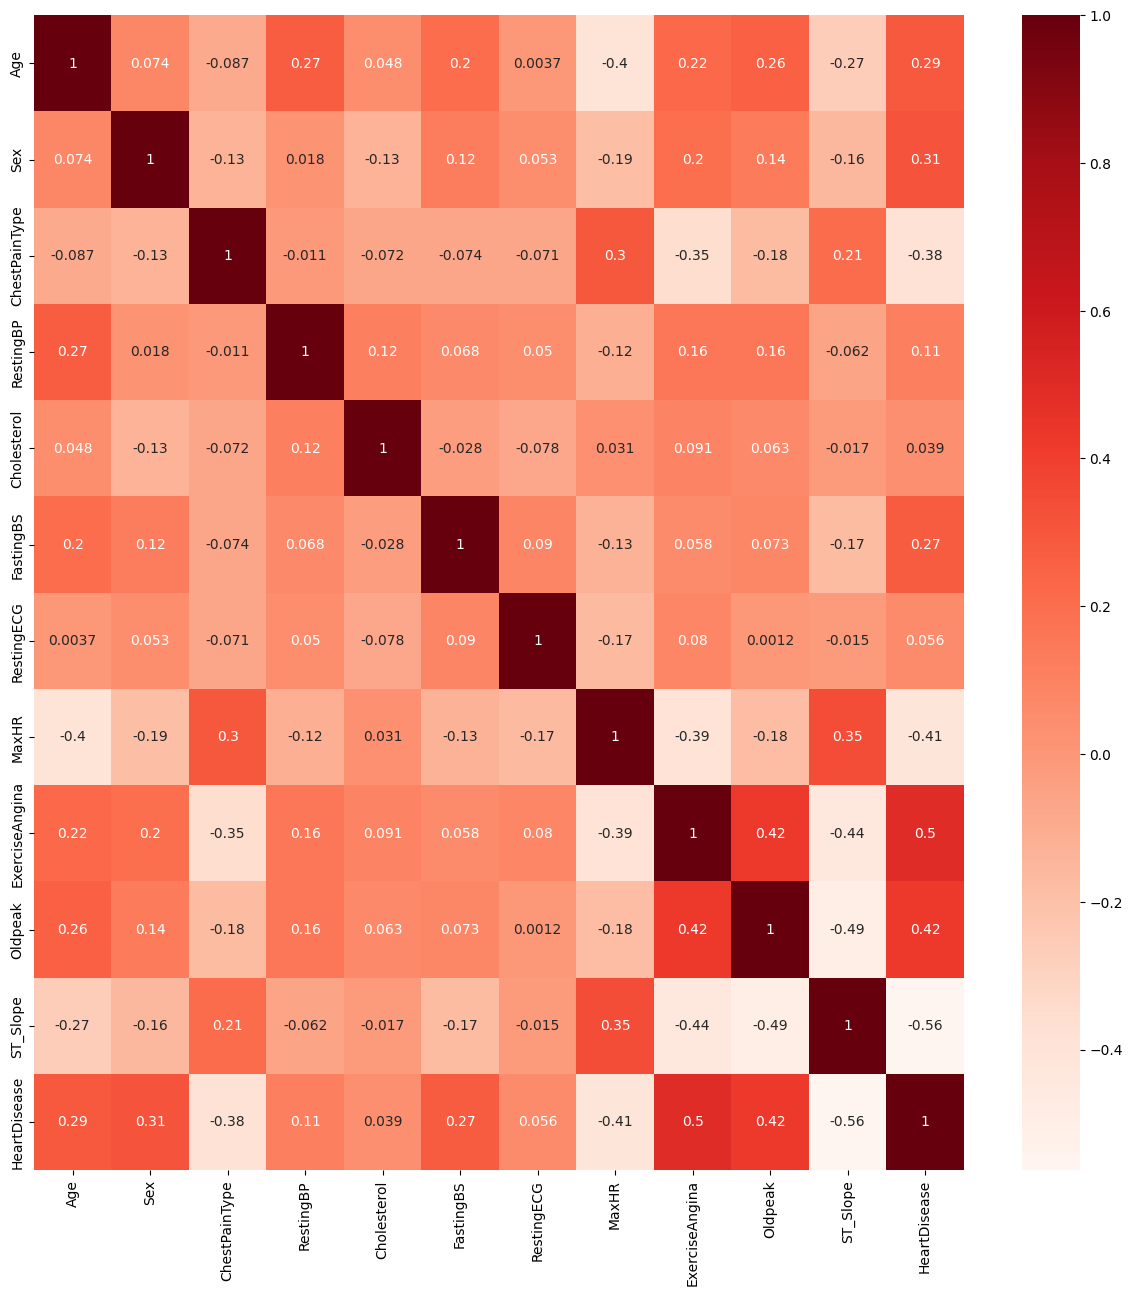

In [207]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), cmap="Reds", annot=True)
plt.show()

step:14 Independent and Dependent Variable Creation .

In [208]:
X = data.drop("HeartDisease",axis=1)
y = data["HeartDisease"]

In [209]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [210]:
X.shape

(890, 11)

In [211]:
y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


In [212]:
y.shape

(890,)

# Model Building

In [213]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=67)

In [214]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(667, 11)
(667,)
(223, 11)
(223,)


In [215]:
y_train.unique()

array([1, 0])

In [216]:
y_train.value_counts()

,count
HeartDisease,
1,359
0,308


step:16 Balancing the data

In [217]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [218]:
from collections import Counter

print("Actual Classes ", Counter(y_train))
print("After Balancing ", Counter(y_smote))

Actual Classes  Counter({1: 359, 0: 308})
After Balancing  Counter({1: 359, 0: 359})


# Creating Model

In [89]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_smote,y_smote)

LogisticRegression()

In [92]:
## Testing Accuracy


y_pred = lr.predict(X_test)

In [93]:
lr.score(X_test,y_test)

0.852017937219731

In [94]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, f1_score

In [96]:
testing_accuracy = accuracy_score(y_test,y_pred)
testing_accuracy

0.852017937219731

In [97]:
## KNN(K-Nearest Neighbors)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_smote,y_smote)

KNeighborsClassifier()

In [98]:
## Testing Accuracy

y_pred = knn.predict(X_test)

In [99]:
testing_accuracy = accuracy_score(y_test,y_pred)
testing_accuracy

0.8251121076233184

In [100]:
knn.score(X_test,y_test)

0.8251121076233184

In [101]:
## Hyperparameter Tuning

In [102]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors": np.arange(1,50)}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy',verbose=1)

grid_search.fit(X_smote,y_smote)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='accuracy', verbose=1)

In [105]:
print('Best parameters for KNN: ', grid_search.best_params_)
print('Best score for KNN: ', grid_search.best_score_)

Best parameters for KNN:  {'n_neighbors': np.int64(7)}
Best score for KNN:  0.8412490287490287


In [106]:
# SVM(Support Vector Machine)

from sklearn.svm import SVC

svm = SVC()

svm.fit(X_smote,y_smote)

SVC()

In [107]:
svm.score(X_test,y_test)

0.874439461883408

In [108]:
y_pred = svm.predict(X_test)

In [109]:
accuracy_score(y_test,y_pred)

0.874439461883408

In [120]:
# hyperparameter tuning

param_grid = {'C': np.arange(1,20,5),
              'gamma': np.arange(0.001,1,0.01)}

svm = SVC()

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy',verbose=1)

grid_search.fit(X_smote,y_smote)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([ 1,  6, 11, 16]),
                         'gamma': array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091, 0.101, 0.111, 0.121, 0.131, 0.141, 0.151, 0.161, 0.171,
       0.181, 0.191, 0.201, 0.211, 0.221, 0.231, 0.241, 0.251, 0.261,
       0.271, 0.281, 0.291, 0.301, 0.311, 0.321, 0.331, 0.341, 0.351,
       0.361, 0.371, 0.381, 0.391, 0.401, 0.411, 0.421, 0.431, 0....
       0.451, 0.461, 0.471, 0.481, 0.491, 0.501, 0.511, 0.521, 0.531,
       0.541, 0.551, 0.561, 0.571, 0.581, 0.591, 0.601, 0.611, 0.621,
       0.631, 0.641, 0.651, 0.661, 0.671, 0.681, 0.691, 0.701, 0.711,
       0.721, 0.731, 0.741, 0.751, 0.761, 0.771, 0.781, 0.791, 0.801,
       0.811, 0.821, 0.831, 0.841, 0.851, 0.861, 0.871, 0.881, 0.891,
       0.901, 0.911, 0.921, 0.931, 0.941, 0.951, 0.961, 0.971, 0.981,
       0.991])},
             scoring='accuracy', verbose=1)

In [121]:
print('Best Parameters for SVC =  ',grid_search.best_params_)
print('Best score for SVC = ',grid_search.best_score_)

Best Parameters for SVC =   {'C': np.int64(16), 'gamma': np.float64(0.10099999999999998)}
Best score for SVC =  0.8566142191142191


In [122]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_smote,y_smote)

DecisionTreeClassifier()

In [124]:
dt.score(X_smote,y_smote)

1.0

In [125]:
dt.score(X_test,y_test)

0.7937219730941704

In [128]:
# hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV

param_grid = {"max_depth": list(range(3,50,2)),
             "criterion":["entropy","gini"],
             "min_samples_split":list(range(10,150,10)),
             "min_samples_leaf":list(range(10,100,5)),
             "max_features":['sqrt','log2',0.5,0.7,4,5,6,7,8]}

dt = DecisionTreeClassifier()

grid_search = RandomizedSearchCV(dt, param_grid,n_iter=1000, cv=5, scoring='accuracy',verbose=1)

grid_search.fit(X_smote,y_smote)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=1000,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21, 23, 25, 27,
                                                      29, 31, 33, 35, 37, 39,
                                                      41, 43, 45, 47, 49],
                                        'max_features': ['sqrt', 'log2', 0.5,
                                                         0.7, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [10, 15, 20, 25, 30,
                                                             35, 40, 45, 50, 55,
                                                             60, 65, 70, 75, 80,
                                                             85, 90, 95],
                                        'min_samples_split': [10, 20, 30, 40,
                                                              50, 60, 70, 80,
                                                              90, 100, 110, 120,
                                                              130, 140]},
                   scoring='accuracy', verbose=1)

In [129]:
print("Best parameters for Decision Tree: ",grid_search.best_params_)
print("Best score fro Decision Tree: ",grid_search.best_score_)

Best parameters for Decision Tree:  {'min_samples_split': 30, 'min_samples_leaf': 10, 'max_features': 0.5, 'max_depth': 33, 'criterion': 'entropy'}
Best score fro Decision Tree:  0.8384518259518259


In [130]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_smote,y_smote)

RandomForestClassifier()

In [131]:
rf.score(X_test,y_test)

0.8654708520179372

In [133]:
# hyperparameter tuning

param_grid = {"n_estimators":[50,100,200,300],
             "max_depth":[4,6,8,10,12,15],
             "criterion":["entropy","gini"],
             "min_samples_split":[10,20,50,100],
             "min_samples_leaf":[1,5,10,20,50],
             "max_features":[0.6,0.8,1.0]
             }

rf = RandomForestClassifier()

grid_search = RandomizedSearchCV(rf, param_grid,n_iter=100, cv=5, scoring='accuracy',verbose=1)

grid_search.fit(X_smote,y_smote)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [4, 6, 8, 10, 12, 15],
                                        'max_features': [0.6, 0.8, 1.0],
                                        'min_samples_leaf': [1, 5, 10, 20, 50],
                                        'min_samples_split': [10, 20, 50, 100],
                                        'n_estimators': [50, 100, 200, 300]},
                   scoring='accuracy', verbose=1)

In [134]:
print("Best parameters for Random Forest: ",grid_search.best_params_)
print("Best score for Random Forest: ",grid_search.best_score_)

Best parameters for Random Forest:  {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 0.6, 'max_depth': 10, 'criterion': 'entropy'}
Best score for Random Forest:  0.8649572649572649


In [219]:
# XGBoost

In [220]:
!pip install xgboost

In [221]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_smote,y_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [222]:
xgb.score(X_test,y_test)

0.8609865470852018

In [223]:
# hyperparameter tuning

param_grid = {'learning_rate': [0.01,0.03, 0.05, 0.1, 0.2,0.3],
              'max_depth': [4, 6, 8, 10],
              'n_estimators': [50, 100, 150, 200],
              'subsample': [0.7, 0.8,0.85, 0.9],
              'reg_alpha': [0, 0.1,0.2,0.4,0.8, 1, 10],
              'reg_lambda': [0.1,0.1,0.2,0.4,0.8, 1, 10 ]
             }

xgb = XGBClassifier()

grid_search = RandomizedSearchCV(xgb, param_grid,n_iter=500, cv=5, scoring='accuracy',verbose=1)

grid_search.fit(X_smote,y_smote)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=500,
                   param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.2, 0.3],
                                        'max_depth': [4, 6, 8, 10],
                                        'n_estimators': [50, 100, 150, 200],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8, 1,
                                                      10],
                                        'reg_lambda': [0.1, 0.1, 0.2, 0.4, 0.8,
                                                       1, 10],
                                        'subsample': [0.7, 0.8, 0.85, 0.9]},
                   scoring='accuracy', verbose=1)

In [224]:
print('Best parameters for XGBoost = ',grid_search.best_params_)
print('Best score for XGBoost = ',grid_search.best_score_)

Best parameters for XGBoost =  {'subsample': 0.85, 'reg_lambda': 0.4, 'reg_alpha': 0.2, 'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.3}
Best score for XGBoost =  0.878885003885004


In [225]:
# choosing the best model among all models

xgb = grid_search.best_estimator_
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Saving the trained model

In [226]:
import pickle

In [227]:
with open('heart_disease_model.pkl', 'wb') as file:
    pickle.dump(xgb, file)

In [228]:
# loading the saved model

with open('heart_disease_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [230]:
# Prediction by taking input from user

In [247]:
input_data = (40,1,1,140,289,0,1,172,0,0.0,2)

# changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting  for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

[0]


In [248]:
if (prediction[0]==0):
  print('The person does not have heart disease')
else:
  print('The person has heart disease')

The person does not have heart disease


(223, 11)

In [ ]:
# input_data = (62,1,1,140,268,0,0,160,0,3.6,2)